In [ ]:
!pip install -U numpy==1.18.5

In [1]:
import numpy as np

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install shap

In [2]:
#load directly from npy files #this step skips the data loading from folders as images
off_dataset = np.load('off_dataset.npy')
target_dataset = np.load('target_dataset.npy')

In [16]:
# import tensorflow as tf
# from tensorflow import keras
# #tf.disable_v2_behavior() 

In [3]:
import sys
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from natsort import natsorted
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential, Model
from keras.layers import Layer,Input, Dense, Dropout, Activation, Concatenate, Flatten, MaxPooling2D, Convolution2D, Convolution1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization, LSTM, GRU, Bidirectional, Lambda
from keras.regularizers import l2,l1
from keras.optimizers import SGD,Adam,RMSprop
from tensorflow.compat.v1 import InteractiveSession
import keras.backend as K
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.models import load_model
import keras.metrics
import tensorflow_addons as tfa
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical, plot_model

Using TensorFlow backend.


In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
###### check for deeplift visualization:  this is important to plot the nucleotide plots later
from deeplift.visualization import viz_sequence

In [5]:
#### model
model = tf.keras.models.load_model('model_seed10_epoch50.hdf5',compile=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
np.random.seed(0)

In [108]:
# set_of_random = np.random.choice(off_dataset.shape[0], 100, replace=False)

In [109]:
# set_of_random.sort()

In [372]:
set_of_random_pos = np.random.choice(7130, 50, replace=False)

In [373]:
set_of_random_neg = np.random.choice(range(7130,153924), 50, replace=False)

In [374]:
set_of_random_pos.sort()
set_of_random_neg.sort()

In [375]:
set_of_random = np.concatenate((set_of_random_pos,set_of_random_neg))

In [376]:
set_of_random_pos

array([ 140,  330,  437,  505,  531,  537,  557,  595,  626,  775,  897,
       1022, 1189, 1209, 1266, 1345, 1472, 1574, 1586, 1770, 1786, 1854,
       1988, 2077, 2088, 2130, 2383, 2454, 2795, 3175, 3257, 3367, 3516,
       4275, 4283, 4541, 4586, 4612, 4758, 5131, 5212, 5304, 5560, 5593,
       5694, 5974, 6499, 6555, 6638, 6992])

In [377]:
set_of_random_neg

array([  7841,  11238,  13530,  15260,  15508,  16506,  16597,  19258,
        26348,  28064,  29759,  31657,  32669,  36287,  41805,  42911,
        53515,  57532,  60322,  63079,  63771,  72622,  79439,  80940,
        87364,  89790,  90030,  90066,  92495,  94968,  95839,  97853,
        98087, 102511, 103668, 110758, 112243, 115895, 121098, 129871,
       130552, 133878, 135219, 136325, 139400, 140471, 141266, 145252,
       146972, 151034])

In [378]:
set_of_random

array([   140,    330,    437,    505,    531,    537,    557,    595,
          626,    775,    897,   1022,   1189,   1209,   1266,   1345,
         1472,   1574,   1586,   1770,   1786,   1854,   1988,   2077,
         2088,   2130,   2383,   2454,   2795,   3175,   3257,   3367,
         3516,   4275,   4283,   4541,   4586,   4612,   4758,   5131,
         5212,   5304,   5560,   5593,   5694,   5974,   6499,   6555,
         6638,   6992,   7841,  11238,  13530,  15260,  15508,  16506,
        16597,  19258,  26348,  28064,  29759,  31657,  32669,  36287,
        41805,  42911,  53515,  57532,  60322,  63079,  63771,  72622,
        79439,  80940,  87364,  89790,  90030,  90066,  92495,  94968,
        95839,  97853,  98087, 102511, 103668, 110758, 112243, 115895,
       121098, 129871, 130552, 133878, 135219, 136325, 139400, 140471,
       141266, 145252, 146972, 151034])

In [140]:
#set_of_random ##makes sure same indices go for Explanation from Off-target and Target

In [379]:
# # select a set of background examples to take an expectation over
bg1 = off_dataset[set_of_random]
bg2 = target_dataset[set_of_random]

In [112]:
#np.random.choice(off_dataset.shape[0], 100, replace=False)

In [13]:
#np.random.choice(target_dataset.shape[0], 100, replace=False)

In [82]:
#!pip uninstall --yes shap

In [81]:
#!pip install shap==0.36.0

In [303]:
# for ind in range(len(model.layers)):
#     print (ind, model.layers[ind])

In [17]:
import shap

In [380]:
e = shap.DeepExplainer(([model.layers[2].input, model.layers[3].input], model.layers[-1].output), [bg1, bg2])

In [381]:
sample_id = 9400

In [202]:
#get both types of output
output = pd.read_csv('output2.csv')
y = output['y']
freq = output['freq']


In [287]:
if y[sample_id]==0:
    print ('negative off target', 'with frequencey: ', freq[sample_id])
else:
    print ('positive off target','with frequencey: ', freq[sample_id])

positive off target with frequencey:  39.0


In [382]:
x1 = off_dataset[sample_id:sample_id+1]
x2 = target_dataset[sample_id:sample_id+1]

In [383]:
x1.shape

(1, 4, 28, 1)

In [384]:
x2.shape

(1, 4, 28, 1)

In [385]:
shap_values = e.shap_values([x1, x2])


In [337]:
# off_expls = np.sum(shap_values[0][0].squeeze(),axis=-1)[:,:,None]*x1.squeeze()

In [339]:
# tar_expls = np.sum(shap_values[0][1].squeeze(),axis=-1)[:,:,None]*x2.squeeze()

In [349]:
# for off_item in off_expls:
#     viz_sequence.plot_weights(off_item)

In [350]:
# for tar_item in tar_expls:
#     viz_sequence.plot_weights(tar_item)

In [386]:
off_shap = shap_values[0][0]
tar_shap = shap_values[0][1]

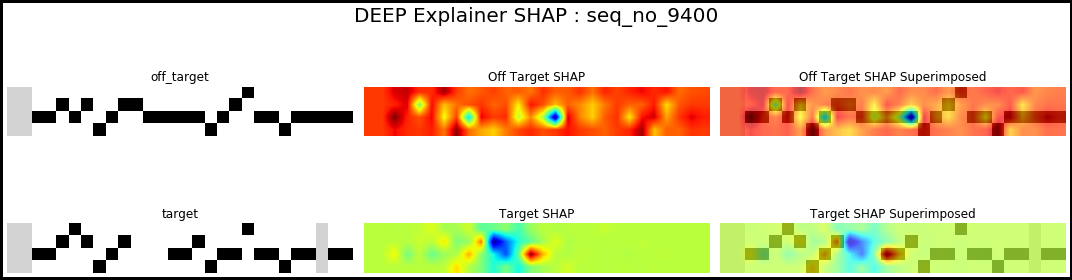

In [389]:
fig  = plt.figure(figsize=(15,5),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
ax = fig.gca()
plt.subplots_adjust(hspace = .1, wspace = .1)
plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.title('off_target', color='k')
plt.subplot(2,3,4)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.title('target', color='k')
plt.subplot(2,3,2)
plt.axis('off')
plt.imshow(off_shap.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('Off Target SHAP', color='k')
plt.subplot(2,3,5)
plt.axis('off')
plt.imshow(tar_shap.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('Target SHAP', color='k')
plt.subplot(2,3,3)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.imshow(off_shap.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('Off Target SHAP Superimposed', color='k')
plt.subplot(2,3,6)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.imshow(tar_shap.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('Target SHAP Superimposed', color='k')
plt.tight_layout()
fig.suptitle('DEEP Explainer SHAP : seq_no_' + str(sample_id) , fontsize=20, color='k')
#plt.show()
plt.savefig('DEEPExplainer_SHAP'+str(sample_id)+'.png', dpi=800)

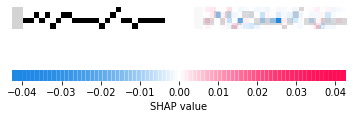

<Figure size 432x288 with 0 Axes>

In [388]:
# plot the feature attributions
shap.image_plot(shap_values[0][0], x1)

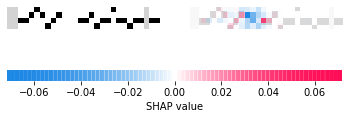

In [390]:
shap.image_plot(shap_values[0][1], x2)

In [ ]:
# # explain how the input to the 7th layer of the model explains the top two classes
# def map2layer(x, layer):
#     feed_dict = dict(zip([model.layers[2].input, model.layers[3].input], [preprocess_input(x.copy())]))
#     return K.get_session().run(model.layers[laayer].input, feed_dict)
# e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), map2layer(preprocess_input(X.copy()), 7))

In [391]:
########### Gradient explainer
g = shap.GradientExplainer(([model.layers[2].input, model.layers[3].input], model.layers[-1].output), [bg1, bg2],
                           #local_smoothing=100
                          )

In [392]:
g_shap_values = g.shap_values([x1, x2])


In [359]:
# g_off_expls = np.sum(g_shap_values[0][0].squeeze(),axis=-1)[:,:,None]*x1.squeeze()

In [360]:
# g_tar_expls = np.sum(g_shap_values[0][1].squeeze(),axis=-1)[:,:,None]*x2.squeeze()

In [361]:
# for off_item in g_off_expls:
#     viz_sequence.plot_weights(off_item)

In [362]:
# for tar_item in g_tar_expls:
#     viz_sequence.plot_weights(tar_item)

In [393]:
g_off_shap = g_shap_values[0][0]
g_tar_shap = g_shap_values[0][1]

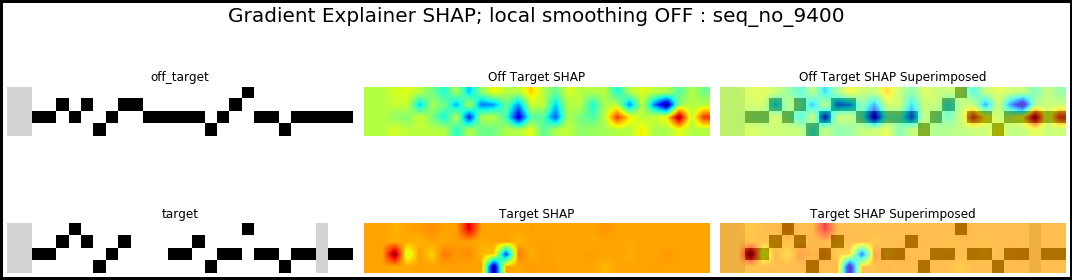

In [394]:
fig  = plt.figure(figsize=(15,5),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
ax = fig.gca()
plt.subplots_adjust(hspace = .1, wspace = .1)
plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.title('off_target', color='k')
plt.subplot(2,3,4)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.title('target', color='k')
plt.subplot(2,3,2)
plt.axis('off')
plt.imshow(g_off_shap.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('Off Target SHAP', color='k')
plt.subplot(2,3,5)
plt.axis('off')
plt.imshow(g_tar_shap.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('Target SHAP', color='k')
plt.subplot(2,3,3)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.imshow(g_off_shap.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('Off Target SHAP Superimposed', color='k')
plt.subplot(2,3,6)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.imshow(g_tar_shap.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('Target SHAP Superimposed', color='k')
plt.tight_layout()
fig.suptitle('Gradient Explainer SHAP; local smoothing OFF : seq_no_' + str(sample_id) , fontsize=20, color='k')
#plt.show()
plt.savefig('GradExplainerSHAP_sample'+str(sample_id)+'.png', dpi=800)

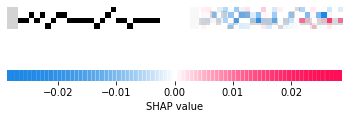

In [395]:
# plot the feature attributions
shap.image_plot(g_shap_values[0][0], x1)

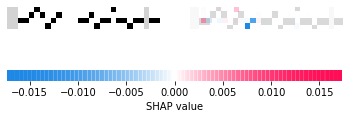

In [396]:
# plot the feature attributions
shap.image_plot(g_shap_values[0][1], x2)